# HeartCare

## Target

According to the World Health Organization, heart disease claims 12 million lives annually worldwide. Developed countries, including the United States, witness half of all deaths attributed to cardiovascular disease. Early detection of cardiovascular issues empowers high-risk patients to adopt lifestyle changes, mitigating complications. This research aims to pinpoint key risk factors for heart disease and employ logistic regression to predict overall risk. By uncovering these insights, we can enhance preventive measures and medical interventions, potentially saving countless lives from the grips of heart disease.

## Data

Los datos manejados en este datset seran los siguientes, cabe aclarar que esta información es extraida de https://www.who.int/data la OMS: 

* Gender: Male or female
* Age: Age of the patient
* Current smoker: Whether the patient is a current smoker or not
* Number of cigarettes per day: The number of cigarettes the person smoked on average in one day
* Takes blood pressure medication: Whether or not the patient was taking blood pressure medication
* Stroke: Whether or not the patient has had a previous stroke
* Hypertensive: Whether or not the patient was hypertensive
* Diabetes: Whether or not the patient had diabetes
* Cholesterol: Total cholesterol level
* Systolic Blood Pressure: Systolic Blood Pressure
* Diastatic Blood Pressure: Diastolic Blood Pressure
* BMI: Body Mass Index
* Heart rate: Heart rate
* Glucose:Glucose level
* 10-Year CHD (Class): 10-Year Risk of CHD CHD

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Data source URL
url = "https://raw.githubusercontent.com/javLeoParra/Pandas/main/framingham.csv"

# Reading the data from the CSV file into a Pandas DataFrame
data = pd.read_csv(url)

# Printing the shape of the DataFrame to check the number of rows and columns
print(data.shape)

(4238, 16)


We were able to observe that the data set has 4.238 instances, 15 attributes to make the prediction and one class.
Following the above, we specify the distribution of each of the attributes.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


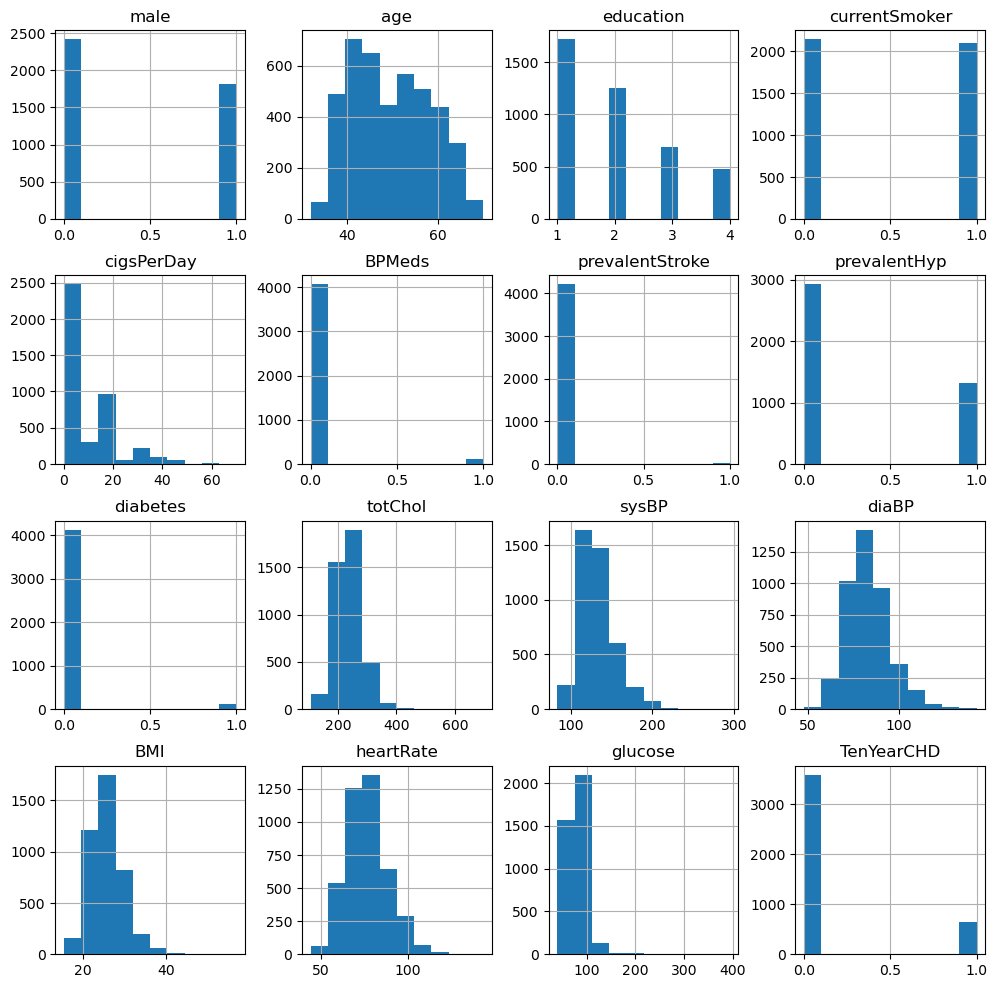

In [3]:
# Plotting Histograms for DataFrame Columns
data.hist(figsize=(12, 12))

# Displaying the Plots
plt.show()

Taking into account the above, we proceed to clean the data set, eliminating the rows that find any of their attributes null.

<Axes: ylabel='count'>

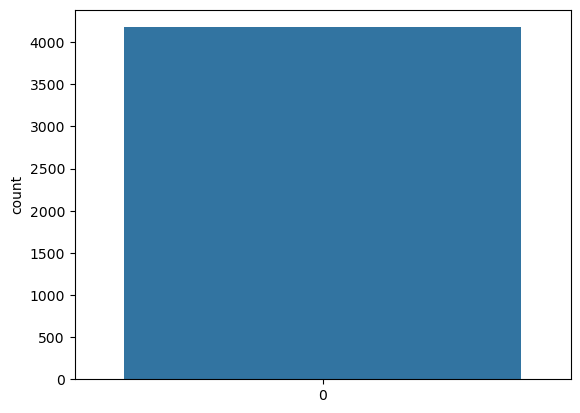

In [4]:
# Dropping Rows with Missing Values
data = data.dropna(axis=0, thresh=15)

# Calculating Percentage of Missing Values in Each Row
missing_percentage = (100 * (data.isnull().sum(axis=1) / data.shape[1])).round(2)

# Creating a Countplot of Missing Value Percentages
sns.countplot(missing_percentage.sort_values(ascending=False))

Finally, after applying the cleanup on our dataset, we retain 4,177 instances. Now, we will perform a separation of numerical and categorical features

In [5]:
# List of Numeric Features
numeric_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# List of Categorical Features
categoric_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

# Columns to be Imputed (Fill Missing Values)
columns_to_be_imputed = []

# Loop through columns to identify columns with missing values
for i in data.columns:
    # Calculate the percentage of missing values for the current column
    null_percent = (100 * (data[i].isnull().sum() / data.shape[0]))
    # If the percentage of missing values is greater than 0, add the column to the list for imputation
    if (null_percent > 0):
        columns_to_be_imputed.append(i)

# Impute missing values using the mode for each column with missing values
for i in columns_to_be_imputed:
    data[i] = data[i].fillna(data[i].mode()[0])

# Convert selected categorical features to categorical data type
for i in categoric_features:
    data[i] = data[i].astype('category')

We perform the separation of our training and test dataset respectively.

In [6]:
# Slicing Data for Features and Target
x = data.iloc[0:, :15]  # Features (Independent Variables)
y = data.iloc[0:, 15]   # Target (Dependent Variable)

# Splitting Data into Training and Validation Sets
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.20, random_state=1, shuffle=True)

## Algorithm Application – Logistic Regression

The application of a logistic regression algorithm in the context of a specific data set, where the class falls between being or not prone to heart attack, is justified for several fundamental reasons. Logistic regression is a powerful tool and widely used in binary classification problems, such as determining the propensity for a heart attack. Below are the reasons for applying this algorithm to the data set in question:

1. **Nature of the binary classification problem:** The data set presents an objective variable or class with two well-defined categories: being prone or not to a heart attack. Logistic regression is perfectly adapted to this type of problem, since its objective is to predict the probability that an instance belongs to one of the two classes. Furthermore, logistic regression provides interpretable results, which is crucial when dealing with medical problems, where a clear understanding of the factors that influence the prediction is required.

2. **Computational Efficiency and Simplicity:** Logistic regression is a relatively simple and computationally efficient algorithm compared to more complex models such as neural networks. In many cases, logistic regression can be enough to get accurate and useful results, especially when the relationships between variables are linear or near-linear.

3. **Good generalization with limited data:** If the available data set is not very large, logistic regression may be a preferable option. Unlike some more complex models, logistic regression can generalize well even with a limited number of data, avoiding overfitting problems.

4. **Interpretability and transparency:** In the medical field, model interpretability is essential to gain the trust of healthcare professionals and patients. Logistic regression provides coefficients that indicate the direction and magnitude of the influence of each independent variable on the prediction of the target class. This allows us to understand which factors are most relevant in determining the propensity for a heart attack.

5. **Risk assessment and decision making:** Logistic regression allows the probability of being prone to a heart attack to be calculated for each individual in the data set. This probability can be used to assess the individual risk of each patient and support decision-making in the field of preventive medicine.

6. **Availability and robustness in machine learning libraries:** Logistic regression is widely implemented in machine learning libraries, such as scikit-learn, making it easy to implement and use. These libraries also have functions to evaluate model performance and perform cross-validation, which ensures the robustness of the algorithm.

7. **Potential to incorporate more variables and improve the model:** Although the initial model is applied with the default variables, the logistic regression is flexible enough to incorporate new relevant variables and improve the accuracy of the model. As more data and insights become available, it is possible to tune and optimize the model for better results.

In summary, the application of a logistic regression algorithm on the data set that focuses on the prediction of heart attack propensity is justified by its binary classification nature, its simplicity, efficiency, interpretability, and ability to provide a solid foundation for informed medical decision making. It is always important to remember that the choice of the algorithm must consider the specific context of the problem and the nature of the data available.

## Results

In [7]:
# Importing the statsmodels library
import statsmodels.api as sm

# Creating and Fitting the Logistic Regression Model
modelo = sm.Logit(endog=Y_train, exog=X_train)
modelo = modelo.fit()

# Printing the Summary of the Model
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.387651
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3341
Model:                          Logit   Df Residuals:                     3326
Method:                           MLE   Df Model:                           14
Date:                Sun, 23 Jul 2023   Pseudo R-squ.:                 0.07011
Time:                        11:20:44   Log-Likelihood:                -1295.1
converged:                       True   LL-Null:                       -1392.8
Covariance Type:            nonrobust   LLR p-value:                 5.036e-34
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.4502      0.111      4.057      0.000       0.233       0.668
age           

In [8]:
# Generating Predictions from the Fitted Logistic Regression Model
predicciones = modelo.predict(exog=X_validation)

# Classifying the Predictions Based on a Threshold of 0.5
clasificacion = np.where(predicciones < 0.5, 0, 1)

In [9]:
# Adding Constant to the Validation Set for Prediction
X_test = sm.add_constant(X_validation, prepend=True)

# Generating Predictions from the Fitted Logistic Regression Model
predicciones = modelo.predict(exog=X_validation)

# Classifying the Predictions Based on a Threshold of 0.5
clasificacion = np.where(predicciones < 0.5, 0, 1)

# Calculating Accuracy Score on the Validation Set
accuracy = accuracy_score(
    y_true=Y_validation,
    y_pred=clasificacion,
    normalize=True
)

# Printing the Accuracy of the Model on the Test Set
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 83.73205741626795%


In [10]:
# Creating Confusion Matrix
confusion_matrix = pd.crosstab(
    Y_validation.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)

The logistic model created to predict the probability of suffering a heart disease obtained a correct classification percentage of 83.73%.

## Architecure 
Logistic Regression Model:

Input:The input of the Logistic Regression model consists of a set of characteristics (independent variables) that are used to predict the dependent variable (binary class) in the heart disease detection problem. These characteristics may include data such as age, cholesterol level, systolic blood pressure, diastolic blood pressure, body mass index (BMI), heart rate, among other risk factors related to heart disease.

Output:The output of the Logistic Regression model is a prediction of the probability that a patient is or is not prone to a heart attack. Since this is a binary classification problem, the output will be in the range of [0, 1], where 0 indicates low probability of heart attack propensity and 1 indicates high probability of heart attack propensity.

Model Architecture:Logistic Regression is a simple linear model, so it does not have a complex architecture like neural networks. The architecture consists of a single layer that performs a linear combination of the input features, followed by a logistic activation function (also known as a sigmoid function) to produce the classification probability. There are no hidden layers in this case.

## Limitations

Implementing a Logistic Regression algorithm for the posed problem of detecting heart disease has some limitations that are worth mentioning:

1. **Linearity:** Logistic Regression assumes that the relationship between the independent variables and the dependent variable is linear. However, in heart disease detection problems, the relationship is likely to be more complex and does not fit a linear model well.

2. **Independence of Observations:** Logistic Regression assumes that the observations are independent of each other. In the case of medical data, this assumption may not be true, as patient observations may be related or correlated due to factors such as geographic location or genetic characteristics.

3. **Multicolinearity:** Logistic Regression can be affected by the presence of multicollinearity between the independent variables. If some independent variables are highly correlated with each other, it can be difficult to determine the individual impact of each on the dependent variable.

4. **Imbalanced Data:** In disease detection problems, it is common for data to be unbalanced, that is, there are many more samples of one class (for example, not prone to heart attack) than of the other class (for example, prone to heart attack). This can bias the model towards the majority class and reduce its ability to detect the minority class.

5. **Does Not Consider Nonlinear Relationships:** Logistic Regression is suitable for problems with linear relationships between variables, but may have difficulty capturing nonlinear relationships. In the case of medical problems, the relationships between risk factors and heart disease may be non-linear, limiting the Logistic Regression model's ability to fit these patterns.

6. **Sensitivity to Relevant Variables Not Included:** If there are important variables that are not included in the Logistic Regression model, this may affect the accuracy of the predictions. Omitting relevant features can lead to a loss of crucial information and, as a result, the model may not be accurate enough.

7. **Feature Scale Dependency:** Logistic Regression can be sensitive to feature scale. If some variables have much larger scales than others, they can dominate the contribution to the model and affect the performance of the algorithm.

In summary, although Logistic Regression is a useful and widely used algorithm for binary classification problems, it has certain limitations when applied to complex heart disease detection problems. To address these limitations, other more advanced machine learning algorithms may be required, such as Neural Networks, Support Vector Machines (SVM) or Decision Trees, which can better handle non-linear relationships, unbalanced data and multiple relevant features. In addition, proper data preprocessing and careful feature selection are crucial aspects to improve model performance in this type of medical problem.

### Additionally, and not satisfied with the application of a single model where we apply our knowledge learned in the course, we will carry out an approximation with neural networks.

## Neural networks

The use of neural networks for solving the heart attack propensity prediction problem offers several advantages and possibilities that could significantly improve the accuracy and performance of the model. Here are some reasons to consider using neural networks in this context:

1. **Modeling of non-linear relationships:** Neural networks are capable of modeling complex and non-linear relationships between variables. For medical problems, such as the prediction of heart disease, the relationships between risk factors and the probability of a heart attack are likely to be nonlinear. Neural networks can learn subtle patterns and relationships between variables, allowing them to better capture the complexity of the problem.

2. **Architectural flexibility:** Neural networks offer a wide variety of architectures, such as feedforward networks, recurrent networks, and convolutional networks, among others. This flexibility allows the structure of the model to be tailored to suit the specifics of the problem and the available data.

3. **Deep Learning Capability:** Deep neural networks, also known as deep learning, are capable of automatically extracting relevant features from data. This is especially useful when the data set contains a large number of variables or features, as neural networks can learn hierarchical representations of the data, making it easier to identify important patterns.

4. **Better performance with large amounts of data:** As more data becomes available, neural networks can improve their performance. Unlike some simpler algorithms, which can reach their learning capacity limits with insufficient data, neural networks can take advantage of large data sets to improve their generalizability.

5. **Transfer learning:** Neural networks pre-trained on massive data sets, such as language models or computer vision models, can be adapted and reused for specific tasks. This can be especially useful in the medical context, where data availability may be limited and knowledge transfer can help improve model performance.

6. **Identification of key features:** Through techniques such as feature importance and activation map visualization, neural networks can provide valuable information about which features or variables are most relevant for the prediction of heart attack propensity. This information may be helpful in better understanding risk factors and making more informed medical decisions.

It is important to note that while neural networks offer many advantages, they can also require significant amounts of training data and computational resources. Furthermore, the interpretability of neural network models can be challenging, as they are often black boxes, which means that the reasoning behind their predictions may not be fully understandable. Therefore, the choice to use neural networks must carefully consider the specific needs and characteristics of the problem at hand.

## Model Neural Networks

For this data set we will use a neural network with two hidden layers with 64 neurons, with relu activation function for 15 dependent attributes, that is, those that will allow us to make the prediction, as loss metric we will use mse and a learning rate of 0.01, we use epocs = 100 which means that we will pass the training values forwards and backwards 100 times.

As a result of the application of this algorithm, we found an accuracy of 83.01%. Below we see graphically the loss and accuracy function, where we can see that for the first iterations the algorithm has a certain deficiency but as it iterates it gets much closer to the possible prediction.

In [11]:
# Importing TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Slicing the DataFrame to Create Input and Output Variables
x = data.iloc[:, :15]  # Input variables (features)
y = data.iloc[:, 15]   # Output variable (target)

# Splitting the Data into Training and Validation Sets
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.20, random_state=42, shuffle=True)

In [12]:
def build_model():
    """
    Build and compile a neural network model for regression.

    Returns:
        model: A compiled neural network model for regression tasks.
    """

    # Create a Sequential model
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[15]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    # Define the optimizer
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

    # Compile the model with Mean Squared Error (MSE) loss and other metrics
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse', 'accuracy'])

    return model


In the previous function, we will use the Mean Error Square penalty function, the metrics we will use for our model will be (Mean Error Square mse, Mean Absolute Error mae); as activation function we will use Rectified Linear Unit (RELU)

In [13]:
# Building the Neural Network Model
model = build_model()

# Printing the Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Training the Neural Network Model
epochs_hist = model.fit(X_train, Y_train, epochs=100, verbose=0)

2023-07-23 11:20:48.295071: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Evaluando el modelo entrenado
Keys:
dict_keys(['loss', 'mae', 'mse', 'accuracy'])


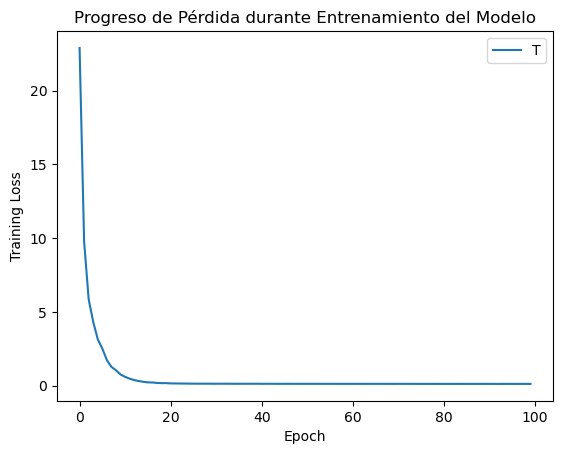

In [15]:
# Evaluating the Trained Model
print("Evaluando el modelo entrenado")

# Printing the Keys of Training History
print("Keys:")
print(epochs_hist.history.keys())

# Plotting the Training Loss Progress
plt.plot(epochs_hist.history['loss'])
plt.title('Progreso de Pérdida durante Entrenamiento del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('Training Loss')
plt.show()


We observe that the loss (Training_loss) decreases as more iterations (epoch) are performed.

## Results

In [16]:
# Making Predictions on the Validation Set
predictions = model.predict(X_validation)

27/27 [==============================] - 0s 420us/step


In [17]:
# Evaluating the Trained Model on the Validation Set
pr = model.evaluate(X_validation, Y_validation)

27/27 [==============================] - 0s 484us/step - loss: 0.1319 - mae: 0.3043 - mse: 0.1319 - accuracy: 0.8385


Our model in this case has an effectiveness of **83.01%**

In [18]:
# Building the First Neural Network Model
model_1 = build_model()

# Training the First Neural Network Model
snn = model_1.fit(x=X_train, y=Y_train, epochs=100, verbose=2, validation_data=(X_validation, Y_validation), shuffle=True)

Epoch 1/100
105/105 - 0s - loss: 63.9347 - mae: 5.3668 - mse: 63.9347 - accuracy: 0.5220 - val_loss: 8.3221 - val_mae: 2.5343 - val_mse: 8.3221 - val_accuracy: 0.8182 - 359ms/epoch - 3ms/step
Epoch 2/100
105/105 - 0s - loss: 20.6871 - mae: 3.9772 - mse: 20.6871 - accuracy: 0.5070 - val_loss: 14.5684 - val_mae: 3.4913 - val_mse: 14.5684 - val_accuracy: 0.8361 - 64ms/epoch - 606us/step
Epoch 3/100
105/105 - 0s - loss: 14.2681 - mae: 2.9926 - mse: 14.2681 - accuracy: 0.5241 - val_loss: 1.9664 - val_mae: 1.1248 - val_mse: 1.9664 - val_accuracy: 0.8098 - 62ms/epoch - 590us/step
Epoch 4/100
105/105 - 0s - loss: 10.0329 - mae: 2.7028 - mse: 10.0329 - accuracy: 0.5088 - val_loss: 8.4000 - val_mae: 2.7959 - val_mse: 8.4000 - val_accuracy: 0.1627 - 61ms/epoch - 577us/step
Epoch 5/100
105/105 - 0s - loss: 6.3696 - mae: 2.1350 - mse: 6.3696 - accuracy: 0.5244 - val_loss: 1.2522 - val_mae: 0.9718 - val_mse: 1.2522 - val_accuracy: 0.8266 - 56ms/epoch - 536us/step
Epoch 6/100
105/105 - 0s - loss: 4.0

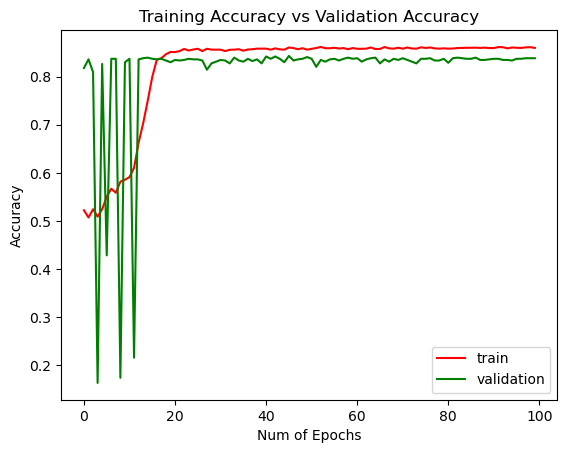

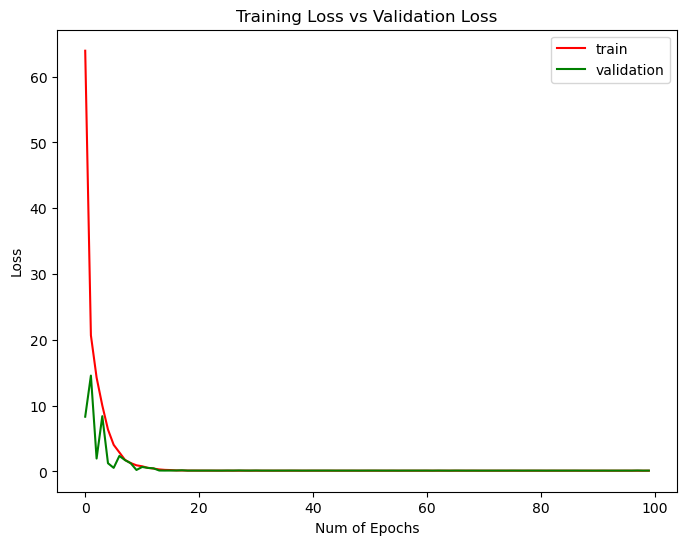

In [19]:
# Plotting Training Accuracy vs Validation Accuracy
plt.figure(0)
plt.plot(snn.history['accuracy'], 'r')
plt.plot(snn.history['val_accuracy'], 'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train', 'validation'])

# Plotting Training Loss vs Validation Loss
plt.figure(1)
plt.plot(snn.history['loss'], 'r')
plt.plot(snn.history['val_loss'], 'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train', 'validation'])

plt.show()

As we were able to show, the neural network at the beginning does not resemble the data validation curve very much, however, as the number of iterations goes by, it tries to look a lot like our set of tests.

For this data set we will use a neural network with two hidden layers with 64 neurons, with relu activation function for 15 dependent attributes, that is, those that will allow us to make the prediction, as loss metric we will use mse and a learning rate of 0.01, we use epocs = 100 which means that we will pass the training values forwards and backwards 100 times.

As a result of the application of this algorithm, we found an accuracy of 83.01%. Below we see graphically the loss and accuracy function, where we can see that for the first iterations the algorithm has a certain deficiency but as it iterates it gets much closer to the possible prediction.

## Architecture

Neural Networks Model:

Input:The input of the Neural Networks model is the same as that of the Logistic Regression, that is, a set of characteristics (independent variables) that are used to predict the dependent variable (binary class) in the heart disease detection problem. The characteristics can be the same, such as age, cholesterol level, blood pressure, BMI, heart rate, etc.

Output:The output of the Neural Network model is also a prediction of the probability that a patient is or is not prone to a heart attack. As in Logistic Regression, the output will be in the range of [0, 1], indicating the probability of susceptibility to heart attack.

Model Architecture:The architecture of the Neural Network model is more complex and flexible compared to Logistic Regression. You can have multiple hidden layers with multiple neurons in each layer. The precise architecture will depend on how the model is designed. Each layer can have different activation functions (ReLU, sigmoid, tanh, etc.) to introduce non-linearities in the model. The output layer may have a sigmoid activation function to produce the classification probability.



## Limitations

Implementing a Neural Network algorithm for the proposed problem of detection of heart disease also has some limitations that it is important to consider:

1. **Requires a significant amount of data:** Neural Networks, especially the more complex ones, require a large amount of data in order to generalize and make accurate predictions. If the data set is small or unbalanced, the neural network may have difficulty learning representative patterns and will tend to overfit the training data.

2. **Architecture choice and tuning:** The performance of a neural network can largely depend on the proper choice of architecture, which includes the number of hidden layers, the number of neurons per layer, the activation function, and other hyperparameters. Fitting the optimal architecture may require experimentation and cross-validation to avoid overfitting or underfitting the model.

3. **Potential overfitting:** Neural networks can be prone to overfitting, especially when the architecture is very complex or when there are too many trainable parameters. Overfitting occurs when the network overfits the training data and does not generalize well to new data. Regularization techniques, such as dropout and the inclusion of more training data, should be applied to mitigate this problem.

4. **Training time and computational resources:** Training deep and complex neural networks can require a large amount of time and computational resources, especially when working with large data sets and complicated architectures. Training neural networks on non-optimized hardware can be a computationally expensive task.

5. **Interpretability:** Neural networks are often black box models, which means that it can be difficult to interpret how and why they make certain decisions. In medical applications, where interpretability is essential to understand the reasoning behind the predictions, this aspect can be challenging.

6. **Missing data and noise:** Neural networks can be sensitive to the presence of missing data or noise in the data set. It is important to perform proper preprocessing and properly treat missing data to ensure model quality and accuracy.

In summary, although Neural Networks are powerful and flexible, they also have limitations when addressing heart disease detection problems. It is critical to perform proper data preprocessing, select the optimal architecture, and apply regularization techniques to avoid overfitting. Furthermore, it is essential to understand that the success of the implementation of a neural network in this type of medical problems can depend to a great extent on the quality, quantity and representativeness of the data available for training.